<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/AffinityPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Machine_Learning/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [135]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('/content/gdrive/My Drive/Machine_Learning/AQ_Boston_Cam-Quincy.csv')
df = df.apply(lambda s:s.str.replace('\'', "").str.replace('[', ""))
df.columns = df.columns.str.strip().str.replace('[', '').str.replace(']', '').str.replace('\'','')
df.drop(df.columns[[10,11,12]], axis=1, inplace=True)

# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes

c = df['location'].astype('category')
d = dict(enumerate(c.cat.categories))
df['location'] = c.cat.codes

df['local'] = df['local'].astype('category')
df['local'] = df['local'].cat.codes

table = pd.pivot_table(df, values='value', index=['location', 'local'], columns=['parameter'], aggfunc=np.sum, fill_value=0)
table.reset_index(inplace=True)
table.columns = table.columns.str.strip()

def covert_to_float(param):
    table[param] =  table[param].astype(float)

arr = ['co','no2','o3','pm10','pm25','so2']
for i in arr:
    covert_to_float(i)
table.head(5)

parameter,location,local,co,no2,o3,pm10,pm25,so2
0,0,0,0.0,0.008,0.0,0.0,0.0,0.0
1,0,1,0.0,0.009,0.0,0.0,0.0,0.0
2,0,2,0.0,0.008,0.0,0.0,0.0,0.0
3,0,3,0.0,0.008,0.0,0.0,0.0,0.0
4,0,4,0.0,0.007,0.0,0.0,0.0,0.0


In [0]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
clusters = 3
X = table

af = AffinityPropagation(preference=-50)
clustering = af.fit(X)

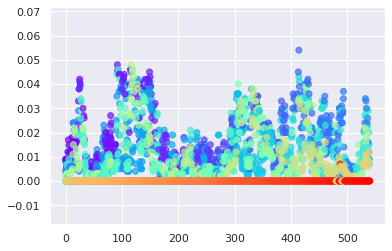

In [149]:
X=X.values
plt.scatter(X[:, 1], X[:, 3], c = clustering.labels_, cmap='rainbow', alpha=0.7)

In [277]:
new_tab = pd.DataFrame(table)
new_tab
clustering.labels_

array([ 80,  80,  80, ..., 454, 455, 455])

In [0]:
def affinity_plot(param1, param2):  
  X = new_tab.loc[new_tab[0] == float(param1)]
  X = X.values
  plt.scatter(X[:, 1], X[:, param2],cmap='rainbow', alpha=0.7)
  plt.show()

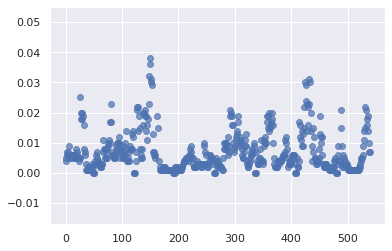

In [286]:
arr_no2 = [3]
for i in arr_no2:
    affinity_plot(i, 3) 

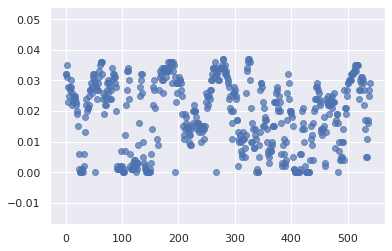

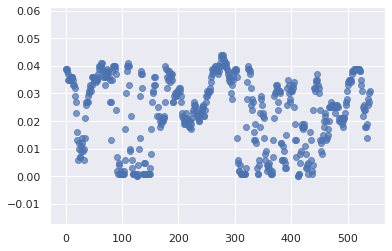

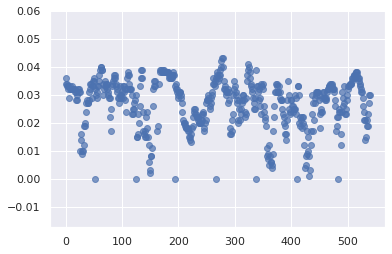

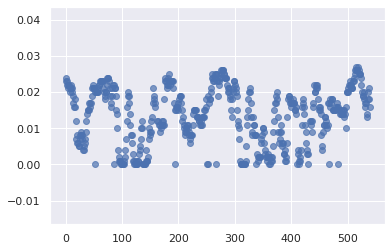

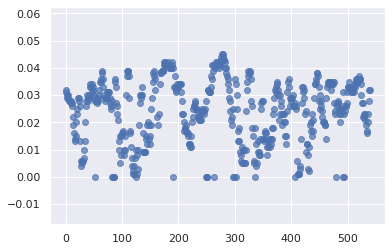

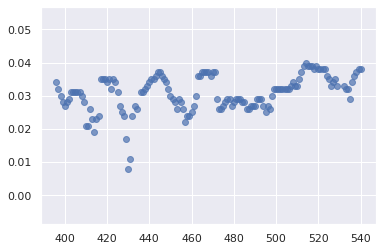

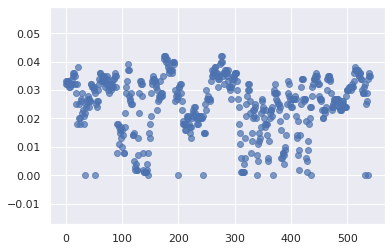

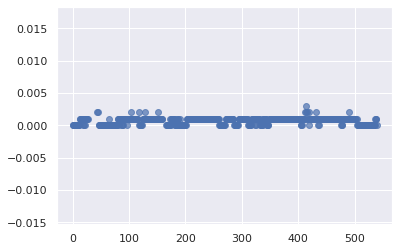

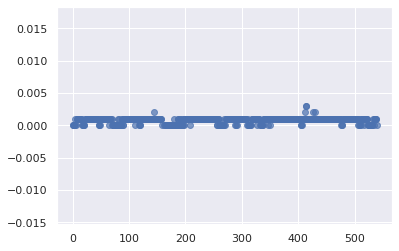

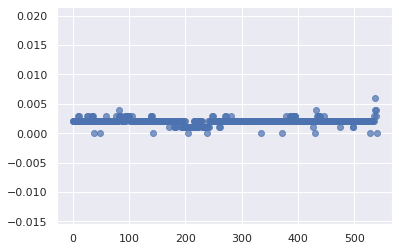

In [287]:
arr_o3 = [1,2,3,4,5,6,7]
for i in arr_o3:
    affinity_plot(i, 4) 

arr_so2 = [0,1,7]
for i in arr_so2:
    affinity_plot(i, 7) 